In [2]:
df_hitter_perf = pd.read_csv('./data/hitter_perf.csv', index_col=0)
df_hitter_etc = pd.read_csv('./data/hitter_etc.csv', index_col=0)

In [3]:
df_hitter_perf.columns,df_hitter_etc.columns

(Index([u'이름', u'연도', u'연봉(=Y)', u'총액(억)', u'계약년수(년)', u'년도', u'AVG_A',
        u'OBP_A', u'SLG_A', u'WAR_A', u'HR%_A', u'BB%_A', u'K%_A', u'BIPA_A',
        u'Spd_A', u'PSN_A', u'wOBA_A', u'wRC_A', u'wRAA_A', u'AVG_B', u'OBP_B',
        u'SLG_B', u'WAR_B', u'HR%_B', u'BB%_B', u'K%_B', u'BIPA_B', u'Spd_B',
        u'PSN_B', u'wOBA_B', u'wRC_B', u'wRAA_B'],
       dtype='object'),
 Index([u'Name', u'Year', u'Spectators', u'TitleSponsors', u'Broadcasting',
        u'GDP', u'Clubs', u'FA_Pitcher', u'FA_Hitter', u'BirthYear', u'Age',
        u'Captain', u'NationalMember', u'Marriage', u'Surgery', u'Salary',
        u'Total', u'Period', u'Transfer', u'GoldenGlove', u'Rookie', u'AllStar',
        u'Interest', u'Inflation', u'Hometown', u'RewardPlayer',
        u'PreviousTeam', u'NewTeam', u'Position'],
       dtype='object'))

In [4]:
dfX_hitter_perf = df_hitter_perf[['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_perf.columns=['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR_A', 'BB_A', 'K_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR_B', 'BB_B', 'K_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']
dfX_hitter_etc = df_hitter_etc[['Spectators','Broadcasting', 'GDP','Clubs','FA_Pitcher','FA_Hitter', 'Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfX_hitter = pd.concat([dfX_hitter_perf,dfX_hitter_etc], axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dfX_hitter = pd.DataFrame(scaler.fit_transform(dfX_hitter.ix[:,:]),columns=dfX_hitter.columns[:]).astype(float)


In [6]:
pd.set_option('display.max_rows', 500)

In [7]:
dfy_hitter = df_hitter_etc['Salary']
dfy_hitter = dfy_hitter[0:125]
idx = dfy_hitter == '-'

In [8]:
dfX_hitter = dfX_hitter.drop(dfX_hitter.index[idx])
dfy_hitter = dfy_hitter.drop(dfy_hitter.index[idx])

In [9]:
dfX_hitter.index = np.arange(1,len(dfX_hitter)+1)
dfy_hitter.index = np.arange(1,len(dfy_hitter)+1)
dfy_hitter.columns =['Salary']

In [10]:
dfy_hitter.tail()

119    12.50
120    10.00
121     2.25
122     7.00
123     7.50
Name: Salary, dtype: object

# PCA

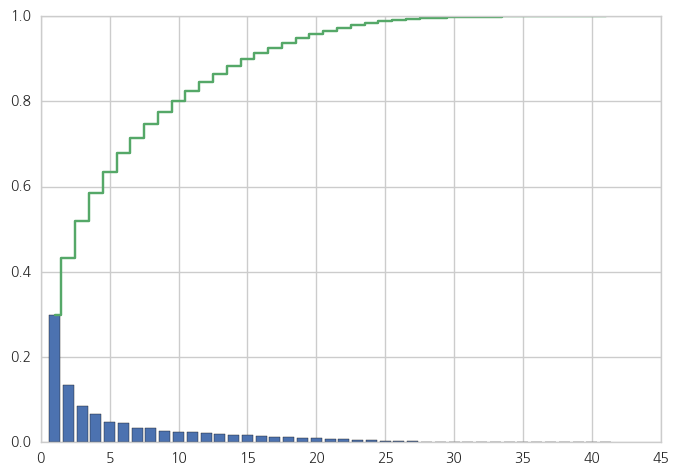

In [11]:
from sklearn.decomposition import PCA

pca = PCA().fit(dfX_hitter)
var = pca.explained_variance_
cmap = sns.color_palette()
plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align='center', color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where='mid', color=cmap[1])
plt.show()

In [12]:
n = pca.explained_variance_ratio_
sum = n[0]+n[1]+n[2]+n[3]+n[4]+n[5]+n[6]+n[7]+n[8]+n[9]
sum

0.79960428711803255

In [13]:
X_pca = PCA(n_components=10)

dfX_pca = pd.DataFrame(X_pca.fit_transform(dfX_hitter))
dfy_pca = np.log(dfy_hitter.astype(float))

dfX_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
dfX_pca.index = np.arange(1,len(dfX_pca)+1)
dfy_pca.index = np.arange(1,len(dfy_hitter)+1)

PCA_data = pd.concat([dfX_pca, dfy_pca],axis=1)
PCA_data.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','Salary']

In [14]:
df_PCA = pd.DataFrame(X_pca.components_,columns=dfX_hitter.columns,index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [15]:
df_PCA.head()

,AVG_A,OBP_A,SLG_A,WAR_A,HR_A,BB_A,K_A,BIPA_A,Spd_A,PSN_A,...,FA_Hitter,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar
PC1,0.205273,0.230491,0.243998,0.237160,0.190674,0.153634,-0.030270,0.114976,-0.042956,0.096106,...,-0.020413,-0.014382,0.023392,0.096941,0.030422,0.104194,0.034320,0.148815,0.090857,0.140136
PC2,-0.085713,-0.076039,-0.063835,-0.132495,-0.030302,-0.033525,0.156186,0.027532,-0.072271,-0.109772,...,0.230343,0.064360,-0.076264,0.067148,0.032947,0.086512,-0.004230,-0.122581,-0.071436,-0.140503
PC3,-0.104366,-0.014753,0.216092,0.066920,0.339253,0.066721,0.276900,-0.157305,-0.285588,-0.004765,...,0.026926,0.146474,0.035633,0.022027,0.112981,0.030160,-0.072709,0.067385,0.022952,0.078337
PC4,0.198582,0.088311,0.045333,0.167345,-0.045811,-0.066624,0.018275,0.293090,0.311278,0.266397,...,0.167634,0.188490,0.143695,0.114880,0.017272,0.169415,-0.099843,0.189166,0.131589,0.231020
PC5,-0.231543,-0.183754,0.047438,0.012117,0.157159,-0.091493,0.342713,-0.154850,0.246302,0.335481,...,0.047693,-0.095987,-0.217254,-0.229876,-0.254579,0.190073,-0.155433,0.031660,0.020343,-0.068408


### nlargets와 nsmallest
- PC1 -> overall stats
- PC2 -> 야구 시장 상황
- PC3 -> 선수의 힘 (+: 홈런, 장타, 삼진율
                    -: 스피드, 타율)
- PC4 -> 선수의 스피드(+: 스피드, 인필드타구의 안타율, 호타준족, AllStar
                       -: 장타, 홈런, 득점기여도)
- PC5 -> ??(+: 호타준족, 삼진율
            -: 결혼, 타율, 주장)
- PC6 -> ??생존률(+: 볼넷, 출루율
                  -: 주장, 나이, 신인왕, 올스타)
- PC7 -> ??(+: 이적, 인필드타구, 안타율, 타율
            -: 볼넷)
- PC8 -> 이적&실력(+: 이적, 신인왕, 골든글러브, 수술, 국가대표
                   -: 나이)
- PC9 -> 나이&안정성(+: 나이, 수술
                     -: 결혼, 국가대표)
- PC10 -> 반짝이(+: 신인왕
                 -: 호타준족)

sns.pairplot(PCA_data)
plt.show()

In [16]:
regression = 'Salary ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10'
model1 = sm.OLS.from_formula(regression, data=PCA_data)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     24.76
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           4.82e-24
Time:                        04:46:11   Log-Likelihood:                -69.959
No. Observations:                 123   AIC:                             161.9
Df Residuals:                     112   BIC:                             192.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6654      0.040     41.242      0.0

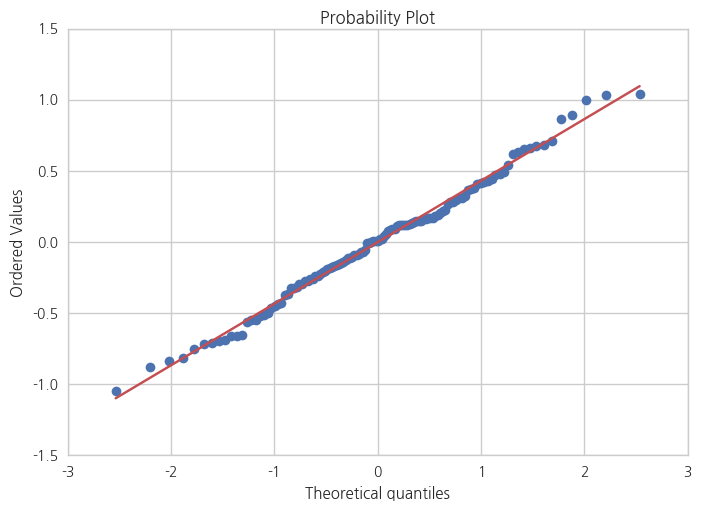

In [17]:
plt.figure()
sp.stats.probplot(result1.resid, plot=plt)
plt.show()

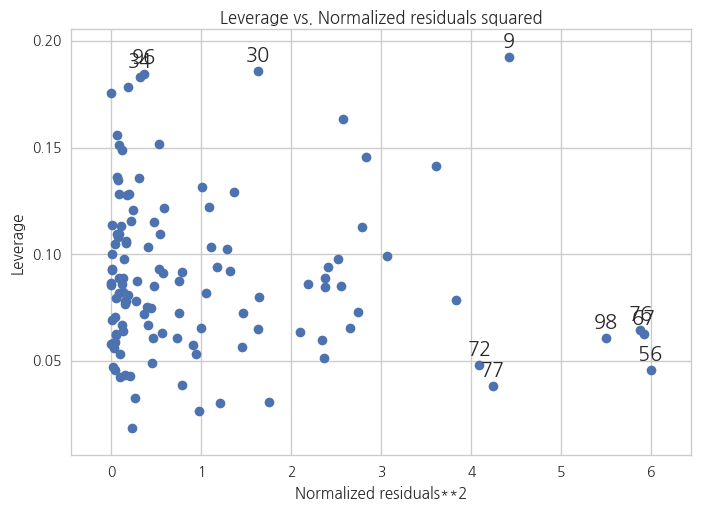

In [18]:
sm.graphics.plot_leverage_resid2(result1)
plt.show()

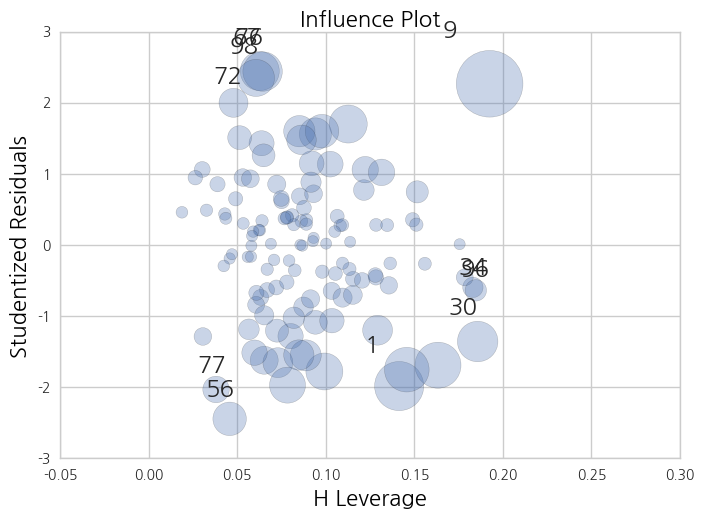

In [19]:
sm.graphics.influence_plot(result1, plot_alpha=0.3)
plt.show()

In [20]:
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(dfX_hitter)-2)
idx = np.where(cooks_d2 < fox_cr)[0]
PCA_data_2 = PCA_data.ix[idx+1,:]
len(PCA_data_2)

116

In [21]:
del PCA_data_2['PC5']
del PCA_data_2['PC6']
del PCA_data_2['PC7']

In [22]:
regression = 'Salary ~ PC1 + PC2 + PC3 + PC4 + PC8 + PC9 + PC10'
model2= sm.OLS.from_formula(regression, data=PCA_data_2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     43.17
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           1.68e-28
Time:                        04:46:16   Log-Likelihood:                -56.580
No. Observations:                 116   AIC:                             129.2
Df Residuals:                     108   BIC:                             151.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6635      0.038     43.746      0.0

sns.pairplot(PCA_data_2)
plt.show()

# Cross validation

In [23]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression

/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
model = LinearRegression()
cv = StratifiedKFold(PCA_data_2.ix[:,-1],3)
r2_cvs = cross_val_score(model,PCA_data_2.ix[:,:-1], PCA_data_2.ix[:,-1],'r2',cv)
print('R^2 결과: {}'.format(r2_cvs))
print('R^2 평균: {}'.format(r2_cvs.mean()))

R^2 결과: [ 0.70132106  0.66161695  0.53697783]
R^2 평균: 0.633305277006


In [34]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(PCA_data_2.ix[:,-1], result2.predict(PCA_data_2.ix[:,:-1]))
print('모형의 MAE 결과: {}'.format(-mae))

모형의 MAE 결과: -0.318319270863


In [26]:
mae_cvs = cross_val_score(model,PCA_data_2.ix[:,:-1], PCA_data_2.ix[:,-1],'mean_absolute_error',cv)
print('CVS MAE 결과: {}'.format(mae_cvs.mean()))

CVS MAE 결과: -0.339364626986


/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_we

### Train data의 MAE

### >>> Overfitting

In [81]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
model_ridge = Ridge(alpha=0.5).fit(PCA_data_2.ix[:,:-1],PCA_data_2.ix[:,-1])

In [82]:
model = LinearRegression()
cv = StratifiedKFold(PCA_data_2.ix[:,-1],3)
cross_val_score(model_ridge,PCA_data_2.ix[:,:-1], PCA_data_2.ix[:,-1],'r2',cv)

array([ 0.70329456,  0.66160807,  0.53669926])

In [83]:
a=cross_val_score(model_ridge,PCA_data_2.ix[:,:-1], PCA_data_2.ix[:,-1],'r2',cv)
a.mean()

0.6338672995457294

In [84]:
b=cross_val_score(model_ridge,PCA_data_2.ix[:,:-1], PCA_data_2.ix[:,-1],'mean_absolute_error',cv)
b.mean()

/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


-0.33527084496442683